In [31]:
import numpy as np #linear algebra
import pandas as pd #data manipulation and analysis
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization
import sklearn.preprocessing as skp #machine learning (preprocessing)
import sklearn.cluster as skc #machine learning (clustering)
import warnings # ignore warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from scipy.spatial import ConvexHull, convex_hull_plot_2d

path = "../data/cleanData/fullData.csv"

# # Permanently changes the pandas settings
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

#### Hypothesis: The passage of SB 52 bans in 10 counties will significantly impact the likelihood of other counties passing similar bans, particularly those that share similar characteristics or are close to the ten counties. 

In [32]:
df = pd.read_csv(path)
df = df.drop(['Unnamed: 0'], axis=1)
df=df.fillna(0)
df.head()

,County Name,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,"Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",Banned or not
0,"Adams County, Ohio",27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,...,36.1,44467,24539,5205.44,385,4572,167427,47.1,583.87,0.0
1,"Allen County, Ohio",101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,...,19.5,55114,28671,15555.51,2286,45012,1983272,253.9,402.55,1.0
2,"Ashland County, Ohio",52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,...,24.2,58168,28992,5702.44,1034,18234,701075,124.0,422.99,0.0
3,"Ashtabula County, Ohio",97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,...,25.8,49680,26777,15281.91,1806,24464,913850,139.0,702.07,0.0
4,"Athens County, Ohio",62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,...,21.9,47061,24990,12969.70,1029,13265,469095,124.0,503.64,0.0


In [33]:
df.iloc[:, 1:-1]

,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,...,"Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020"
0,27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,0.00,...,9461,36.1,44467,24539,5205.44,385,4572,167427,47.1,583.87
1,101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,0.00,...,16266,19.5,55114,28671,15555.51,2286,45012,1983272,253.9,402.55
2,52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,52.32,...,9431,24.2,58168,28992,5702.44,1034,18234,701075,124.0,422.99
3,97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,97.34,...,10406,25.8,49680,26777,15281.91,1806,24464,913850,139.0,702.07
4,62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,62.06,...,11148,21.9,47061,24990,12969.70,1029,13265,469095,124.0,503.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,132472,6623.60,26891.82,21327.99,66765.89,122801.54,3841.69,397.42,2649.44,0.00,...,14333,20.7,66337,36047,14439.45,2701,57707,2719738,214.3,617.16
84,64971,3963.23,15852.92,8446.23,33460.06,58214.02,1754.22,129.94,3703.35,0.00,...,13966,25.9,96634,44442,3573.40,1083,25265,1591247,145.4,431.76
85,21708,1128.82,4840.88,4428.43,10897.42,21121.88,108.54,65.12,151.96,0.00,...,12356,22.9,61626,30596,1714.93,494,9495,425207,53.8,406.88
86,537633,29032.18,111827.66,101612.64,275805.73,415590.31,82257.85,1075.27,23118.22,0.00,...,15843,23.3,63111,37373,67204.12,13210,246876,12462532,1309.2,412.79


In [34]:
# define number of features to keep
k = 10

# load data
X = df.iloc[:, 1:-1]
y = df['Banned or not']

# perform feature selection
selector = SelectKBest(f_regression, k=k)
X_new = selector.fit_transform(X, y)

# get feature names of selected features
selected_features = X.columns[selector.get_support()]

# print selected features
print(selected_features)


Index(['Black or African American alone',
       'Median value of owner-occupied housing units, 2017-2021',
       'Median selected monthly owner costs -with a mortgage, 2017-2021',
       'Median selected monthly owner costs -without a mortgage, 2017-2021',
       'Median gross rent, 2017-2021', 'Total retail sales per capita, 2017',
       'Mean travel time to work (minutes), workers age 16 years+, 2017-2021',
       'Median household income (in 2021 dollars), 2017-2021',
       'Per capita income in past 12 months (in 2021 dollars), 2017-2021',
       'Persons in poverty'],
      dtype='object')


In [35]:
newdf = df[selected_features]
newdf

,Black or African American alone,"Median value of owner-occupied housing units, 2017-2021","Median selected monthly owner costs -with a mortgage, 2017-2021","Median selected monthly owner costs -without a mortgage, 2017-2021","Median gross rent, 2017-2021","Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty
0,165.25,118300,1159,403,593,9461,36.1,44467,24539,5205.44
1,12912.09,126900,1126,457,758,16266,19.5,55114,28671,15555.51
2,470.84,143100,1124,432,748,9431,24.2,58168,28992,5702.44
3,3796.14,121100,1086,426,735,10406,25.8,49680,26777,15281.91
4,1799.62,150800,1210,464,840,11148,21.9,47061,24990,12969.70
...,...,...,...,...,...,...,...,...,...,...
83,3841.69,177000,1437,553,845,14333,20.7,66337,36047,14439.45
84,1754.22,242400,1696,626,1050,13966,25.9,96634,44442,3573.40
85,108.54,133600,1139,420,682,12356,22.9,61626,30596,1714.93
86,82257.85,159800,1299,525,882,15843,23.3,63111,37373,67204.12


# K-Means Clustering

## Scaling

In [36]:
# Create new data frame for Clustering
df_cluster = newdf


In [37]:
# Scaling the new data frame for clustering
sc = skp.StandardScaler()
data_scale = np.array(df_cluster)
scaled = sc.fit_transform(data_scale.astype(float))
scaled_df = pd.DataFrame(scaled, columns=df_cluster.columns)
scaled_df.head()

,Black or African American alone,"Median value of owner-occupied housing units, 2017-2021","Median selected monthly owner costs -with a mortgage, 2017-2021","Median selected monthly owner costs -without a mortgage, 2017-2021","Median gross rent, 2017-2021","Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty
0,-0.298633,-0.723934,-0.291559,-0.895488,-1.624353,-0.611599,2.859044,-1.299905,-1.256369,-0.377214
1,-0.081841,-0.511531,-0.453171,-0.177526,-0.181102,0.781452,-1.338013,-0.427729,-0.476045,-0.067375
2,-0.293436,-0.111422,-0.462966,-0.509916,-0.268572,-0.617740,-0.149690,-0.177553,-0.415425,-0.362336
3,-0.236881,-0.654780,-0.649065,-0.589690,-0.382283,-0.418148,0.254846,-0.872869,-0.833725,-0.075566
4,-0.270836,0.078753,-0.041794,-0.084457,0.536150,-0.266253,-0.731210,-1.087411,-1.171199,-0.144784


## Finding the best number of clusters

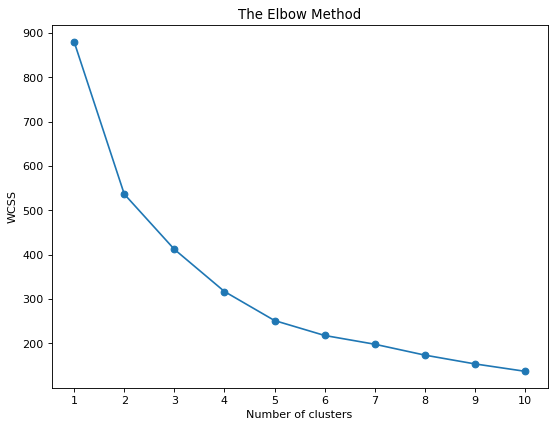

In [38]:
###Decide n-cluster using Elbow Method
wcss=[]
k_range = range(1,11)
for i in k_range:
    kmeans = skc.KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')
# for i, value in enumerate(wcss):
#     ax.text(i+1.05, value-0.005, round(value,1), fontsize=12, fontweight='bold')
    
plt.xticks(k_range)
# plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_method.png')
plt.show()


3. Clustering (Using chosen K values)

In [39]:
# Clustering K Means, K=3
kmeans_3 = skc.KMeans(n_clusters=2,random_state=42)
kmeans_3.fit(scaled_df)
kmeans_3.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
      dtype=int32)

In [40]:
# Assign clustering result to each country in the data frame
df_cluster['cluster_id'] = kmeans_3.labels_
df_cluster.head()

,Black or African American alone,"Median value of owner-occupied housing units, 2017-2021","Median selected monthly owner costs -with a mortgage, 2017-2021","Median selected monthly owner costs -without a mortgage, 2017-2021","Median gross rent, 2017-2021","Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,cluster_id
0,165.25,118300,1159,403,593,9461,36.1,44467,24539,5205.44,0
1,12912.09,126900,1126,457,758,16266,19.5,55114,28671,15555.51,0
2,470.84,143100,1124,432,748,9431,24.2,58168,28992,5702.44,0
3,3796.14,121100,1086,426,735,10406,25.8,49680,26777,15281.91,0
4,1799.62,150800,1210,464,840,11148,21.9,47061,24990,12969.70,0


In [41]:
# Adding county name and banned or not column
df_cluster['Banned or not'] = df.iloc[:,-1]
df_cluster['County Name'] = df.iloc[:,0]
df_cluster.head()

,Black or African American alone,"Median value of owner-occupied housing units, 2017-2021","Median selected monthly owner costs -with a mortgage, 2017-2021","Median selected monthly owner costs -without a mortgage, 2017-2021","Median gross rent, 2017-2021","Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,cluster_id,Banned or not,County Name
0,165.25,118300,1159,403,593,9461,36.1,44467,24539,5205.44,0,0.0,"Adams County, Ohio"
1,12912.09,126900,1126,457,758,16266,19.5,55114,28671,15555.51,0,1.0,"Allen County, Ohio"
2,470.84,143100,1124,432,748,9431,24.2,58168,28992,5702.44,0,0.0,"Ashland County, Ohio"
3,3796.14,121100,1086,426,735,10406,25.8,49680,26777,15281.91,0,0.0,"Ashtabula County, Ohio"
4,1799.62,150800,1210,464,840,11148,21.9,47061,24990,12969.70,0,0.0,"Athens County, Ohio"


In [42]:
# Grouping clusters, and counting num. bans in each cluster 
groupeddf = df_cluster.groupby('cluster_id')['Banned or not'].value_counts(ascending=True)
groupeddf

cluster_id  Banned or not
0           1.0               7
            0.0              61
1           1.0               3
            0.0              17
Name: Banned or not, dtype: int64

### Plots

In [46]:
# # Filter counties for each cluster
# cluster0 = df_cluster.loc[(df_cluster['cluster_id'] == 0)]
# cluster1 = df_cluster.loc[(df_cluster['cluster_id'] == 1)]
# cluster2 = df_cluster.loc[(df_cluster['cluster_id'] == 2)]

# # Extract coordinates for counties
# cluster0_coords = cluster0[[df_cluster.columns[2], df_cluster.columns[1]]].values
# cluster1_coords = cluster1[[df_cluster.columns[2], df_cluster.columns[1]]].values
# cluster2_coords = cluster2[[df_cluster.columns[2], df_cluster.columns[1]]].values

# Filter banned counties for each cluster
cluster0_banned = df_cluster.loc[(df_cluster['cluster_id'] == 0) & (df_cluster['Banned or not'] == 1)]
cluster1_banned = df_cluster.loc[(df_cluster['cluster_id'] == 1) & (df_cluster['Banned or not'] == 1)]
cluster2_banned = df_cluster.loc[(df_cluster['cluster_id'] == 2) & (df_cluster['Banned or not'] == 1)]

# Extract coordinates for banned counties
cluster0_banned_coords = cluster0_banned[[df_cluster.columns[2], df_cluster.columns[1]]].values
cluster1_banned_coords = cluster1_banned[[df_cluster.columns[2], df_cluster.columns[1]]].values
cluster2_banned_coords = cluster2_banned[[df_cluster.columns[2], df_cluster.columns[1]]].values


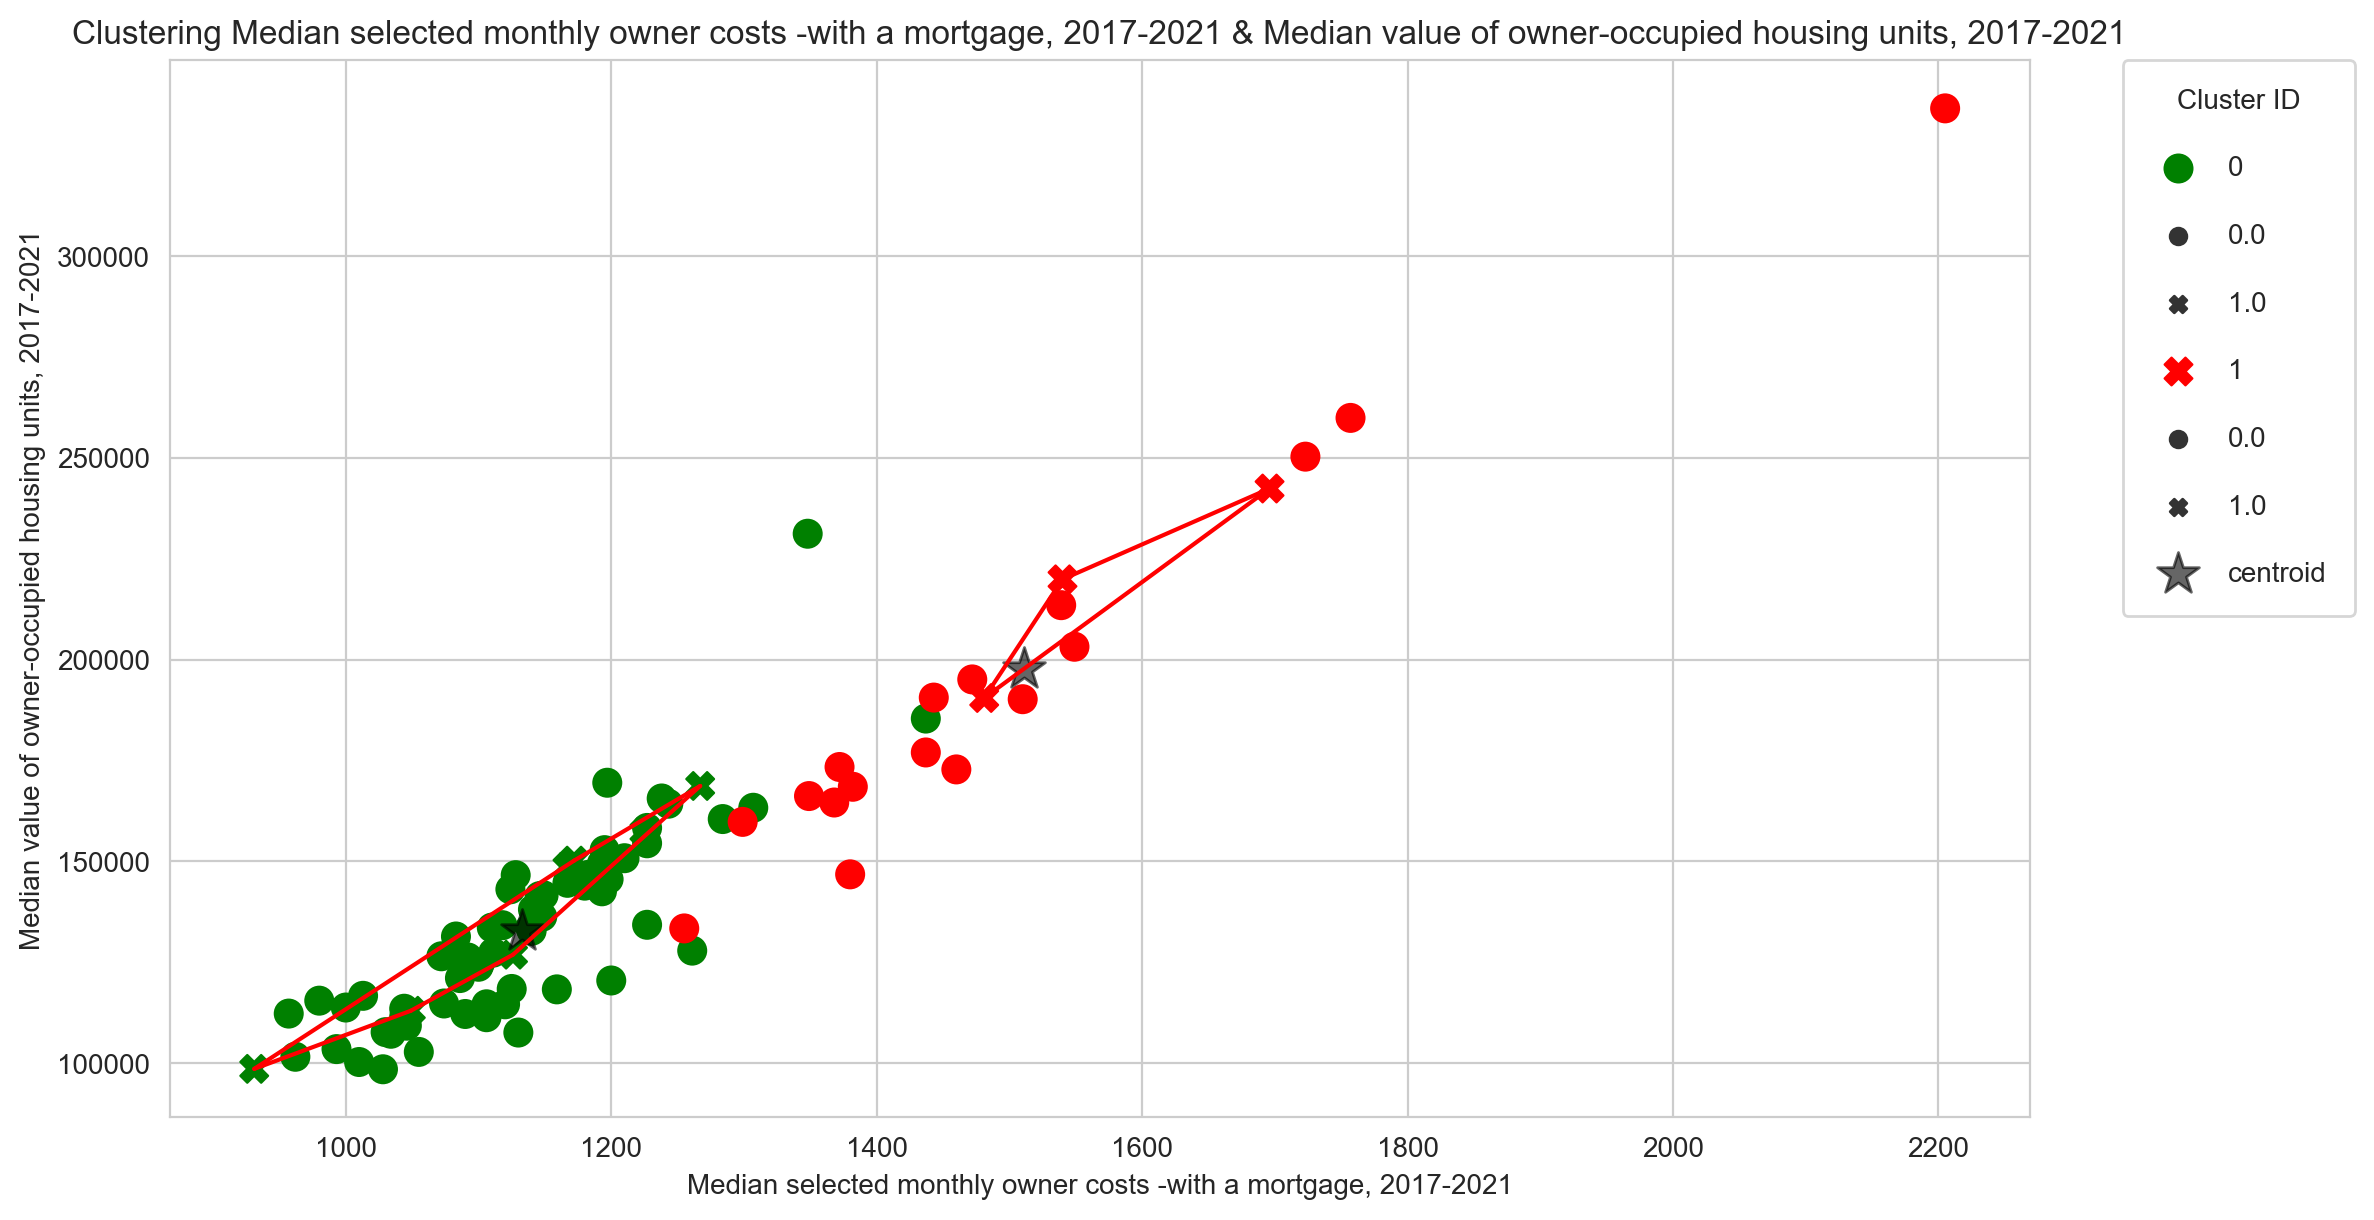

In [48]:
hull0Banned = ConvexHull(cluster0_banned_coords)
hull2Banned = ConvexHull(cluster1_banned_coords)
 


sns.set_style('whitegrid')

# Centroid Inverse Scaling
centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)

# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)

# Scatter plot for cluster 0
sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[2]],
                df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[1]],
                color = 'green', s=100, edgecolor = 'green', marker='o', label= '0', style=df_cluster['Banned or not'])

# Scatter plot for cluster 1
sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[2]], 
                df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[1]], 
                color = 'red', s=100, edgecolor = 'red', label = '1', marker='o', style=df_cluster['Banned or not'])

# Scatter plot for cluster 2
sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[2]],
                df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[1]],
                color = 'blue', s=100, edgecolor = 'blue', label = '2', marker='o', style=df_cluster['Banned or not'])
    
for simplex0b in hull0Banned.simplices:
    ax.plot(cluster0_banned_coords[simplex0b, 0], cluster0_banned_coords[simplex0b, 1], 'k-', color='red')
for simplex2b in hull2Banned.simplices:
    ax.plot(cluster1_banned_coords[simplex2b, 0], cluster1_banned_coords[simplex2b, 1], 'k-', color='red')
    

# Plot centroids
ax.scatter(centroids_ori_scale[:, 2], centroids_ori_scale[:,1], c='black', s=250, marker='*', alpha=0.6, label = 'centroid')

# Add labels and legend
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.xlabel(df_cluster.columns[2])
plt.ylabel(df_cluster.columns[1])
plt.title(f"Clustering {df_cluster.columns[2]} & {df_cluster.columns[1]}")

# Show the plot
plt.show()
